[*********************100%%**********************]  1 of 1 completed


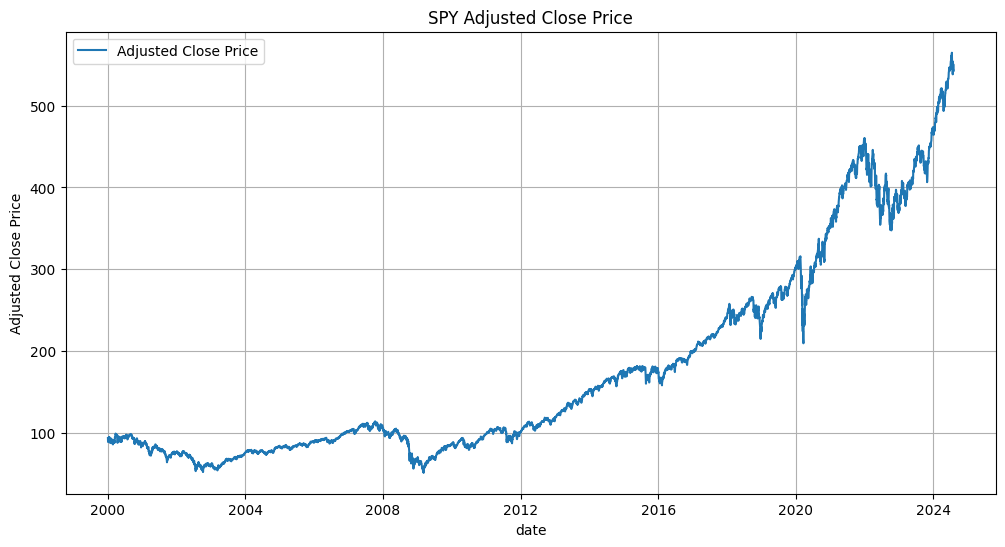

Data has been downloaded, filled, plotted, and saved to SPY.csv


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Define the ticker symbol for SPY ETF
ticker_symbol = 'SPY'

# Get today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Download all available historical data for SPY
df = yf.download(ticker_symbol, start="2000-01-01", end=end_date)

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

# Plot the Adjusted Close prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['adj_close'], label='Adjusted Close Price')
plt.title('SPY Adjusted Close Price')
plt.xlabel('date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Data has been downloaded, filled, plotted, and saved to SPY.csv")


In [15]:
df.isnull().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [16]:
df.head()

,open,high,low,close,adj_close,volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,93.290192,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,89.641968,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,89.802307,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,88.359093,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,93.490631,8066500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6184 entries, 2000-01-03 to 2024-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       6184 non-null   float64
 1   high       6184 non-null   float64
 2   low        6184 non-null   float64
 3   close      6184 non-null   float64
 4   adj_close  6184 non-null   float64
 5   volume     6184 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 338.2 KB


In [19]:
df['logreturn'] = np.log(df['close']).diff()

In [20]:
df.head()

,open,high,low,close,adj_close,volume,logreturn
Date,,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,93.290192,8164300,NaN
2000-01-04,143.53125,144.06250,139.640625,139.7500,89.641968,8089800,-0.039891
2000-01-05,139.93750,141.53125,137.250000,140.0000,89.802307,12177900,0.001787
2000-01-06,139.62500,141.50000,137.750000,137.7500,88.359093,6227200,-0.016202
2000-01-07,140.31250,145.75000,140.062500,145.7500,93.490631,8066500,0.056452


In [21]:
df['logreturn'] = df['logreturn'].shift(-1)

In [22]:
df.head()

,open,high,low,close,adj_close,volume,logreturn
Date,,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,93.290192,8164300,-0.039891
2000-01-04,143.53125,144.06250,139.640625,139.7500,89.641968,8089800,0.001787
2000-01-05,139.93750,141.53125,137.250000,140.0000,89.802307,12177900,-0.016202
2000-01-06,139.62500,141.50000,137.750000,137.7500,88.359093,6227200,0.056452
2000-01-07,140.31250,145.75000,140.062500,145.7500,93.490631,8066500,0.003425


In [23]:
df['slowsma'] = df['close'].rolling(30).mean()
df['fastsma'] = df['close'].rolling(10).mean()

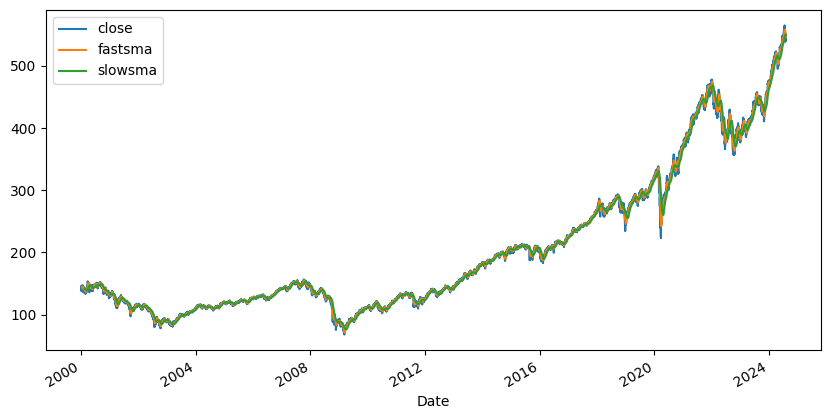

In [24]:
df[['close', 'fastsma', 'slowsma']].plot(figsize=(10, 5));

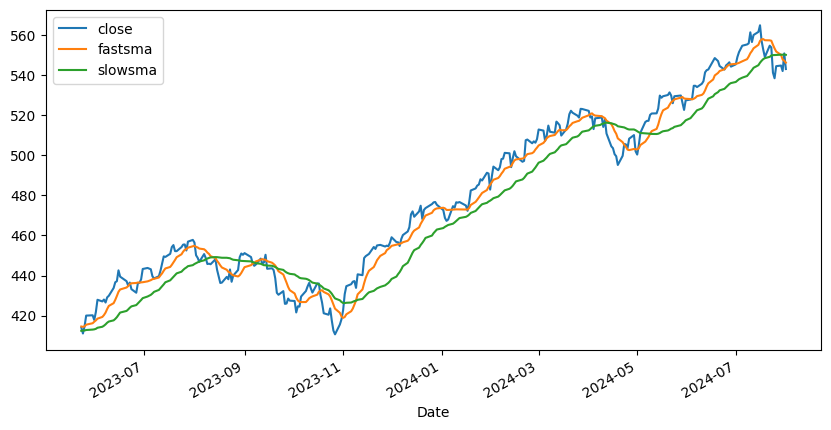

In [26]:
df[['close', 'fastsma', 'slowsma']].iloc[-300:].plot(figsize=(10, 5));

In [27]:
df['signal'] = np.where(df['fastsma'] >= df['slowsma'], 1, 0)

In [28]:
df.iloc[80:].head(10)

,open,high,low,close,adj_close,volume,logreturn,slowsma,fastsma,signal
Date,,,,,,,,,,
2000-04-27,143.0000,147.343750,143.000000,146.000000,93.888954,15595300,-0.006227,147.785417,143.529687,0
2000-04-28,147.0000,147.859375,145.062500,145.093750,93.306198,8743400,0.013478,147.743750,143.614062,0
2000-05-01,146.5625,148.484375,145.843750,147.062500,94.572281,7328300,-0.020177,147.747917,144.720313,0
2000-05-02,145.5000,147.125000,144.125000,144.125000,92.683266,9411900,-0.023696,147.679167,145.057813,0
2000-05-03,144.0000,144.000000,139.781250,140.750000,90.512833,12630700,0.007520,147.397917,144.685937,0
2000-05-04,142.0000,142.359375,140.750000,141.812500,91.196152,5963600,0.012047,147.121875,144.554688,0
2000-05-05,141.0625,144.000000,140.937500,143.531250,92.301422,7862400,-0.007540,146.817708,144.526563,0
2000-05-08,142.7500,143.375000,141.843750,142.453125,91.608086,5064100,-0.008039,146.447396,144.546875,0
2000-05-09,143.0625,143.406250,140.265625,141.312500,90.874580,5620300,-0.022815,146.093229,143.862500,0


In [29]:
df['prevsignal'] = df['signal'].shift(1)
df['buy'] = (df['prevsignal'] == 0) & (df['signal'] == 1) # Fast < Slow --> Fast > Slow
df['sell'] = (df['prevsignal'] == 1) & (df['signal'] == 0) # Fast > Slow --> Fast < Slow

In [32]:
df.iloc[80:].head(10)

,open,high,low,close,adj_close,volume,logreturn,slowsma,fastsma,signal,prevsignal,buy,sell
Date,,,,,,,,,,,,,
2000-04-27,143.0000,147.343750,143.000000,146.000000,93.888954,15595300,-0.006227,147.785417,143.529687,0,0.0,False,False
2000-04-28,147.0000,147.859375,145.062500,145.093750,93.306198,8743400,0.013478,147.743750,143.614062,0,0.0,False,False
2000-05-01,146.5625,148.484375,145.843750,147.062500,94.572281,7328300,-0.020177,147.747917,144.720313,0,0.0,False,False
2000-05-02,145.5000,147.125000,144.125000,144.125000,92.683266,9411900,-0.023696,147.679167,145.057813,0,0.0,False,False
2000-05-03,144.0000,144.000000,139.781250,140.750000,90.512833,12630700,0.007520,147.397917,144.685937,0,0.0,False,False
2000-05-04,142.0000,142.359375,140.750000,141.812500,91.196152,5963600,0.012047,147.121875,144.554688,0,0.0,False,False
2000-05-05,141.0625,144.000000,140.937500,143.531250,92.301422,7862400,-0.007540,146.817708,144.526563,0,0.0,False,False
2000-05-08,142.7500,143.375000,141.843750,142.453125,91.608086,5064100,-0.008039,146.447396,144.546875,0,0.0,False,False
2000-05-09,143.0625,143.406250,140.265625,141.312500,90.874580,5620300,-0.022815,146.093229,143.862500,0,0.0,False,False


In [33]:
is_invested = False
def assign_is_invested(row):
  global is_invested
  if is_invested and row['sell']:
    is_invested = False
  if not is_invested and row['buy']:
    is_invested = True
  
  # otherwise, just remain
  return is_invested

df['is_invested'] = df.apply(assign_is_invested, axis=1)

In [34]:
df['algo_log_return'] = df['is_invested'] * df['logreturn']

In [35]:
# Total algo log return
df['algo_log_return'].sum()

np.float64(0.6067736865634519)

In [36]:
# Total return buy-and-hold
df['logreturn'].sum()

np.float64(1.3173813128923548)

In [37]:
df['algo_log_return'].std(), df['algo_log_return'].mean()/df['algo_log_return'].std()

(np.float64(0.007015382826712097), np.float64(0.013988660079026874))

In [38]:
df['logreturn'].std(), df['logreturn'].mean()/df['logreturn'].std()

(np.float64(0.012298115373544577), np.float64(0.017325017786518203))

### Searching for Fast and Slow Hyperparameters

In [42]:
# Start by writing a function to plug in parameters and obtain score
Ntest = 1000
def trend_following(df, fast, slow):
  global is_invested
  df['slowsma'] = df['close'].rolling(slow).mean()
  df['fastsma'] = df['close'].rolling(fast).mean()
  df['signal'] = np.where(df['fastsma'] >= df['slowsma'], 1, 0)
  df['prevsignal'] = df['signal'].shift(1)
  df['buy'] = (df['prevsignal'] == 0) & (df['signal'] == 1) # Fast < Slow --> Fast > Slow
  df['sell'] = (df['prevsignal'] == 1) & (df['signal'] == 0) # Fast > Slow --> Fast < Slow

  # Split into train and test
  train = df.iloc[:-Ntest]
  test = df.iloc[-Ntest:]

  train_idx = df.index <= train.index[-1]
  test_idx = df.index > train.index[-1]

  is_invested = False
  df.loc[train_idx,'is_invested'] = train.apply(assign_is_invested, axis=1)
  df.loc[train_idx,'algo_log_return'] = train['is_invested'] * train['logreturn']

  is_invested = False
  df.loc[test_idx,'is_invested'] = test.apply(assign_is_invested, axis=1)
  df.loc[test_idx,'algo_log_return'] = test['is_invested'] * test['logreturn']

  return train['algo_log_return'][:-1].sum(), test['algo_log_return'][:-1].sum()

In [43]:
trend_following(df, 10, 30)

(np.float64(0.40681142142976423), np.float64(0.19915802025573903))

In [44]:
# Let's do a grid search
best_fast = None
best_slow = None
best_score = float('-inf')
for fast in range(3, 30):
  for slow in range(fast + 5, 50):
    score, _ = trend_following(df, fast, slow)
    if score > best_score:
      best_fast = fast
      best_slow = slow
      best_score = score
best_fast, best_slow, trend_following(df, best_fast, best_slow)

(10, 15, (np.float64(0.7923762599405704), np.float64(0.33707385528821554)))

In [45]:
train = df.iloc[:-Ntest].copy()
test = df.iloc[-Ntest:].copy()

In [46]:
# Total return buy-and-hold train
train['logreturn'][:-1].sum()

np.float64(0.8360841592275357)

In [47]:
# Total return buy-and-hold test
# Note: last value is NaN, just doing this for the sake of uniformity
test['logreturn'][:-1].sum()

np.float64(0.48958608168759365)

In [48]:

# SR algo vs. SR buy-and-hold train
train['algo_log_return'].mean()/train['algo_log_return'].std(), train['logreturn'].mean()/train['logreturn'].std()

(np.float64(0.02128121781326503), np.float64(0.012681839752301775))

In [49]:
# SR algo vs. SR buy-and-hold test
test['algo_log_return'].mean()/test['algo_log_return'].std(), test['logreturn'].mean()/test['logreturn'].std()

(np.float64(0.047199885520863384), np.float64(0.04602372217397109))

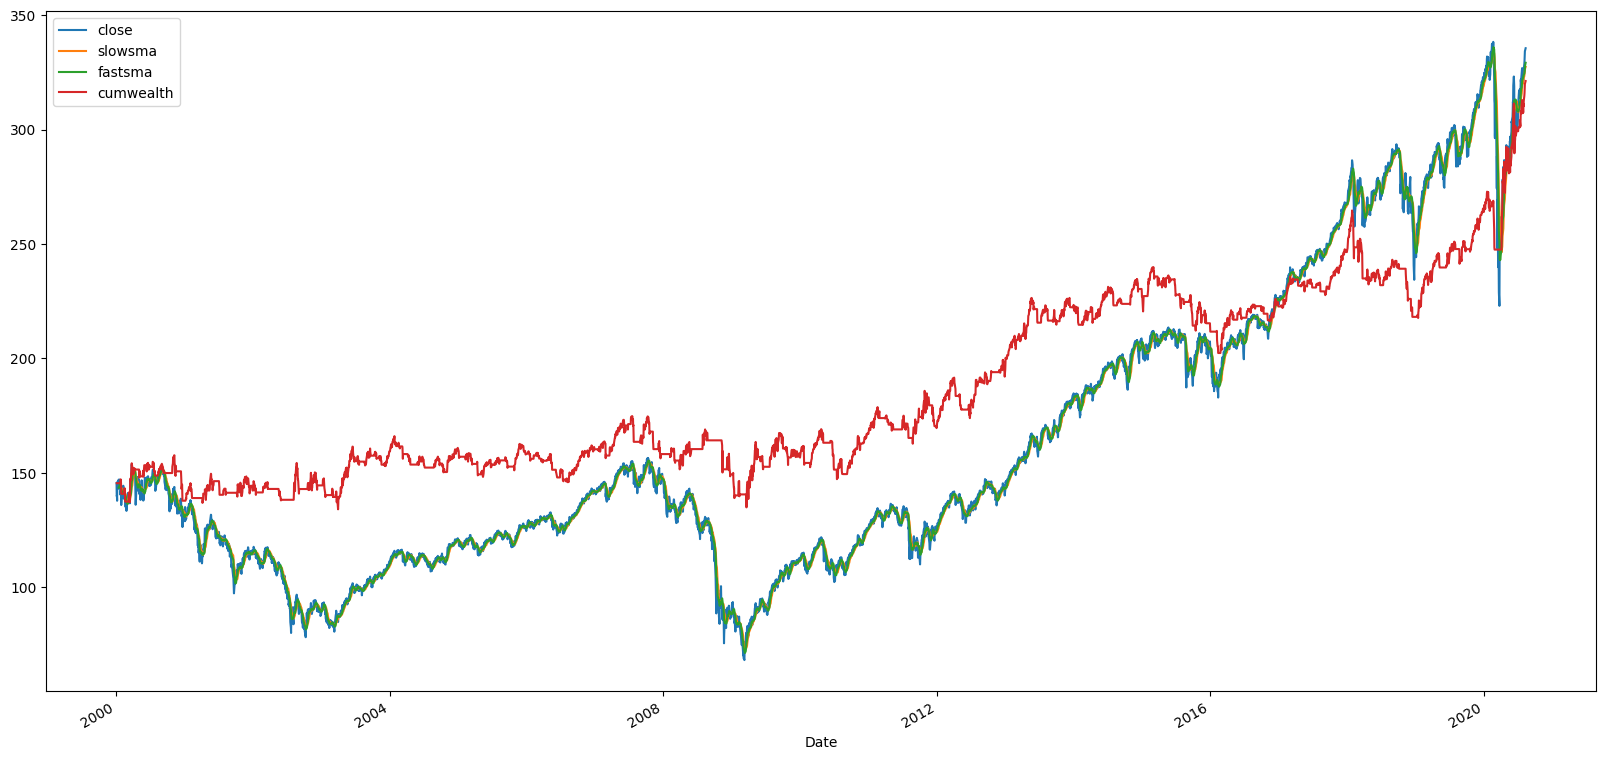

In [50]:
# Wealth over time
train['cum_log_return'] = train['algo_log_return'].cumsum().shift(1)
train['cumwealth'] = train.iloc[0]['close'] * np.exp(train['cum_log_return'])
train[['close', 'slowsma', 'fastsma', 'cumwealth']].plot(figsize=(20,10));